<a href="https://colab.research.google.com/github/prachigupta260301/code/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png">

# spotify-eda-prachigupta
Spotify is one of the biggest music streaming platform and it has millions of users across the globe, these users have  different preferences different usage and they all listen to different artists but also these people who have same preferences and listen to same artists so there is huge scope to scrap out different kinds of information and results from the data of these millions of users.

The datasets can be found on the links - https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
                                         https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=artists.csv
                                         
Use the "Run" button to execute the code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading Datasets
Opendatasets is used to download all the datasets. Let's start by installing this library.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00


In [3]:
dataset_url='https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db'

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prachigupta260301
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db


100%|██████████| 15.5M/15.5M [00:00<00:00, 1.03GB/s]

In [5]:
od.download('https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=artists.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prachigupta260301
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets


100%|██████████| 82.2M/82.2M [00:00<00:00, 993MB/s]

# Data prepration and cleaning

In [6]:
df_tracks=pd.read_csv('spotify-datasets/tracks.csv')

In [8]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


###Finding all the null values

In [9]:
# null value
pd.isnull(df_tracks).sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


Finding out the information about the tracks

In [10]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

# Q. Which are 10 least popular songs?

In [11]:
sorted_df=df_tracks.sort_values('popularity',ascending=True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
135236,0V42QKc5fwqR129hetizY8,My Wubba Dolly,0,167826,0,['Lew Stone'],['40Ar1CY9WEPWK7b211IK81'],1938,0.621,0.4490,5,-4.580,0,0.0620,0.985,0.619000,0.1380,0.936,178.750,4
135230,0LZWgBdX6wZ688csua4cGb,In The Royal Hawaiian Hotel,0,158746,0,['The Nite Owls'],['2rQBWmDXwTpnqbLQpjKgqp'],1938,0.695,0.0954,3,-16.750,1,0.0298,0.988,0.368000,0.1080,0.657,75.489,4
135229,0L4E8UrrII0WlvWQBScxqG,Am I Dreaming?,0,150409,0,"['Tommy Dorsey', 'The Clambake 7']","['4WoGga7UeRcmjD4ufif4nG', '1uQ4R14AubhGYUL24G...",1938,0.695,0.1690,7,-10.067,1,0.1070,0.991,0.814000,0.2160,0.867,162.888,4
135228,0L3jiDNbnzyPo39kUaJZ3C,Movin' the boogie,0,160994,0,"['Pete Johnson', 'Albert Ammons']","['7l71rXhsmDwoDgbyXDadtZ', '1pfiDZtUYY64LDWQZ9...",1938,0.555,0.9010,1,-6.501,1,0.0380,0.971,0.920000,0.1020,0.890,93.101,4
135227,0GbAdJAfViur7mZKGipr5u,Alibi Baby,0,188652,0,"['Tommy Dorsey', 'The Clambake 7']","['4WoGga7UeRcmjD4ufif4nG', '1uQ4R14AubhGYUL24G...",1938,0.640,0.7410,0,-3.253,1,0.1840,0.814,0.193000,0.6820,0.851,176.518,4
135226,0GXbqxO4icMzj7tUqjfGbu,If somebody would only love me,0,221018,0,"['Jelly Roll Morton and his Orchestra', 'Jelly...","['0Qs5ml5ZLbcWDG0EW49pMS', '4XepUkisa56DUeA3gb...",1938,0.657,0.3420,0,-6.823,1,0.0330,0.942,0.735000,0.3600,0.637,89.908,4
135225,0FgFq4tTHEtbLGxDol7AkF,If the Man In the Moon Were a Coon,0,198553,0,"['Tommy Dorsey', 'The Clambake 7']","['4WoGga7UeRcmjD4ufif4nG', '1uQ4R14AubhGYUL24G...",1938,0.588,0.8950,5,-3.420,1,0.0675,0.904,0.520000,0.0650,0.973,129.772,4
135224,0CzVyqzwgzL7UFW8uvfMIg,It All Comes Back to Me Now,0,175852,0,"['June Robbing', 'Eddy Duchin']","['2Tq457b99jDmx5BdjQJ7ZJ', '4NMlon6w1HmlQGMjxU...",1938,0.467,0.0740,7,-12.396,1,0.0360,0.955,0.000165,0.0476,0.191,105.319,4
135223,0C7wjpM0XgwplYgo8c834t,Hyena stomp,0,199676,0,"['Jelly Roll Morton and his Orchestra', 'Jelly...","['0Qs5ml5ZLbcWDG0EW49pMS', '4XepUkisa56DUeA3gb...",1938,0.554,0.6760,3,-6.168,1,0.0523,0.961,0.517000,0.3690,0.747,96.312,4
135222,0BL93JqzRuz3CyJYroulFh,Now You've Got Me Worryin' for You,0,214017,0,"['Lew Sherwood', 'Eddy Duchin']","['7ILjyipCX9VZ0mB2AtyMGs', '4NMlon6w1HmlQGMjxU...",1938,0.665,0.3720,3,-10.951,1,0.0734,0.951,0.020600,0.2330,0.426,125.724,4


In [12]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


# Q.What are the top 10 songs with popularity greater than '90'?

In [13]:
most_popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4


In [19]:
df_tracks.reset_index(inplace=True) # Reset the index
df_tracks.set_index('release_date',inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index, errors='coerce')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
NaT,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Q.Who is the artist in the 18th row?

In [20]:
df_tracks[['artists']].iloc[18]

,NaT
artists,['Victor Boucher']


# Convert duration of songs from miliseconds to seconds
In the given dataset the duration of songs is in milliseconds, it would be much easier for us to analyse this data if we will convert this duration into seconds.

In [21]:
df_tracks['duration']=df_tracks['duration_ms'].apply(lambda x:round(x/1000))
df_tracks.drop('duration_ms',inplace=True,axis=1)

In [22]:
df_tracks.duration.head()

,duration
release_date,
1922-02-22,127
1922-06-01,98
1922-03-21,182
1922-03-21,177
NaT,163


To plot the data a heatmap is created using Seaborn.

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

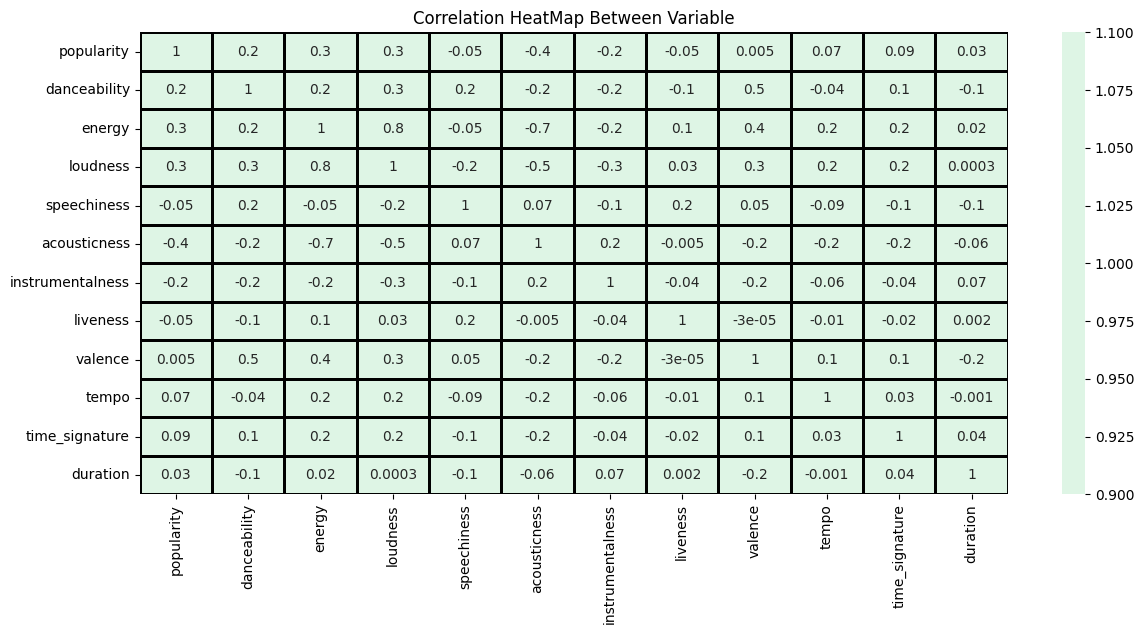

In [26]:
corr_df=df_tracks.drop(['id','name','artists','id_artists','key','mode','explicit'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=1,vmax=1,center=0,cmap='mako',linewidths=1,linecolor='Black')
heatmap.set_title('Correlation HeatMap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [27]:
sample_df=df_tracks.sample(int(0.004*len(df_tracks)))

In [28]:
print(len(sample_df))

2346


# Plotting a correlation graph between 'Loudness' and 'Energy'
For plotting this graph I have used regplot() : This method is used to plot data and a linear regression model fit.

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

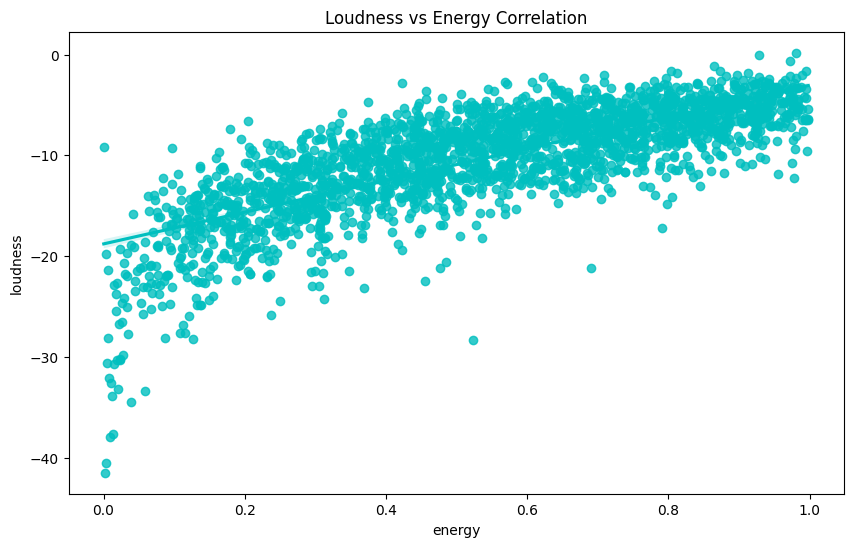

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='loudness',x='energy',color='c').set(title='Loudness vs Energy Correlation')

# Plotting a correlation graph between 'Popularity' and 'Acousticness'
Again for this I have used regplot.

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

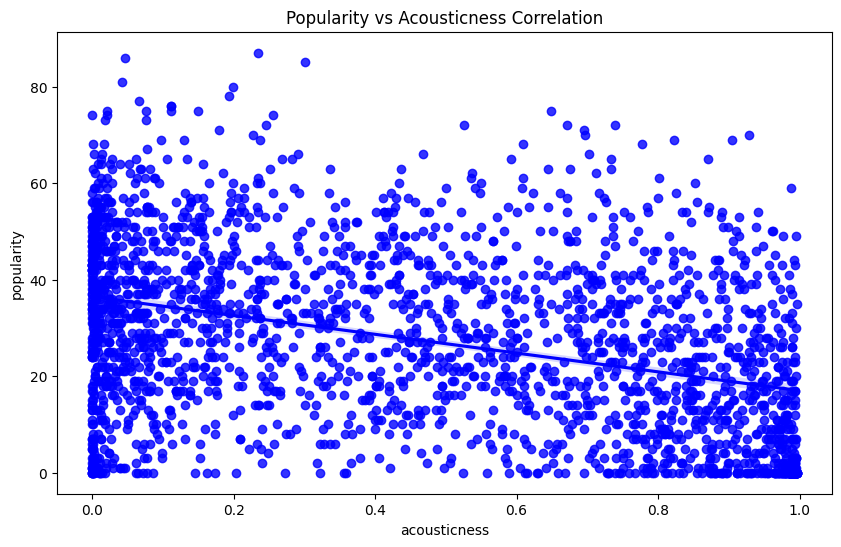

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='popularity',x='acousticness',color='b').set(title='Popularity vs Acousticness Correlation')

In [31]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

# Distribution Plot to visualize the total number of songs in each year that is available on spotify in since 1922.

### Let's install the latest version of seaborn so that we have all the features available

Creating a displot for finding out number of songs per year using seaborn

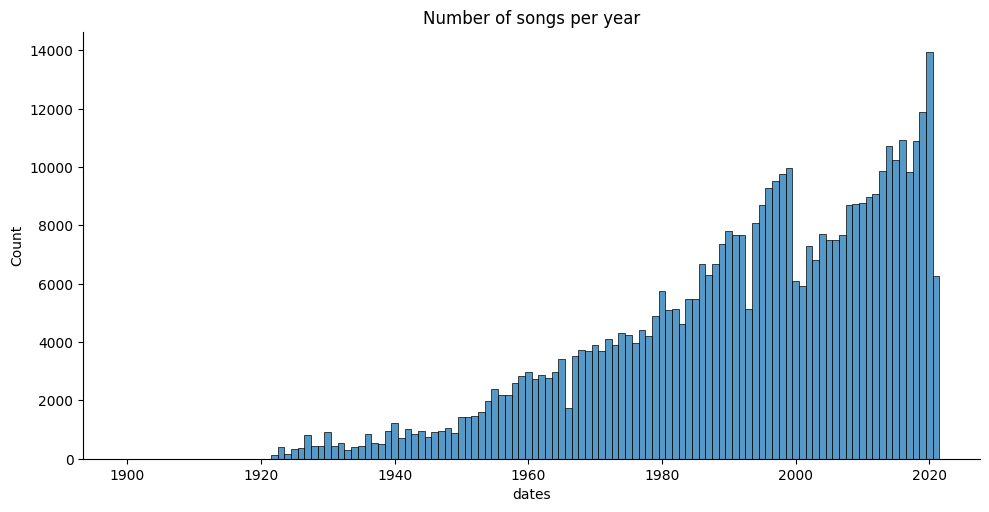

In [34]:
sns.displot(years,discrete=True,aspect=2,height=5,kind='hist').set(title='Number of songs per year')

Highest number of songs per year were for the year 2020.

# Plotting a barplot to find out duration of songs over the years.

plotting a barplot using seaborn between year and duration

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938')

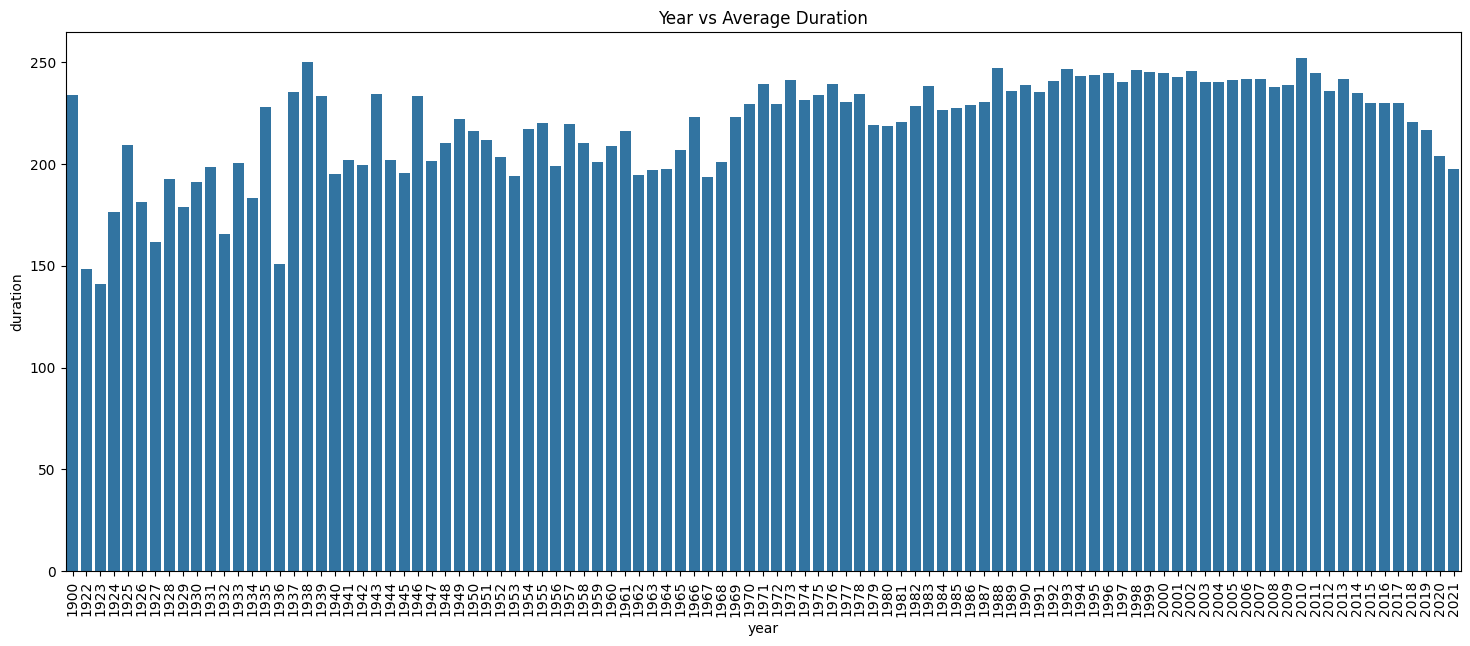

In [39]:
df_tracks_cleaned = df_tracks.dropna(subset=['dates']).copy()
df_tracks_cleaned['year'] = df_tracks_cleaned['dates'].dt.year
average_duration_per_year = df_tracks_cleaned.groupby('year')['duration'].mean().reset_index()

fig,ax=plt.subplots(figsize=(18,7))
sns.barplot(x='year',y='duration',data=average_duration_per_year,ax=ax,err_kws={'linewidth': False}).set(title='Year vs Average Duration')
plt.xticks(rotation=90)

# Line plot for average duration of songs over the years.

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

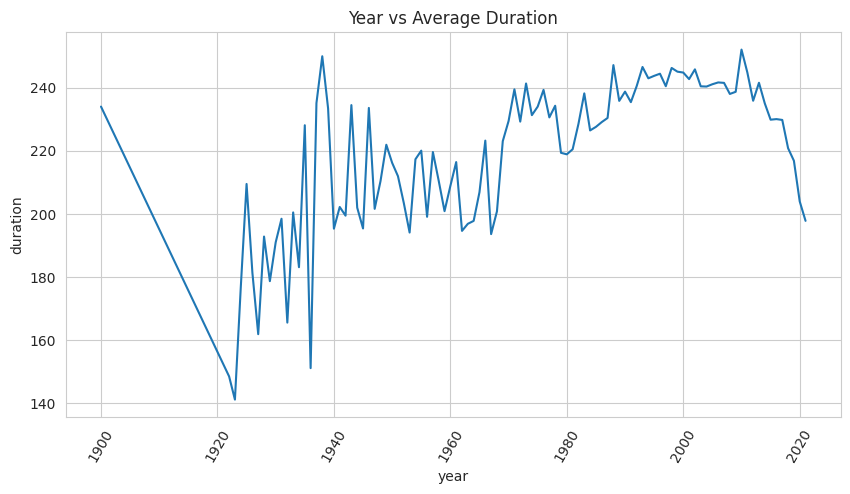

In [42]:
df_tracks_cleaned = df_tracks.dropna(subset=['dates']).copy()
df_tracks_cleaned['year'] = df_tracks_cleaned['dates'].dt.year

average_duration_per_year = df_tracks_cleaned.groupby('year')['duration'].mean().reset_index()

sns.set_style(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='year', y='duration', data=average_duration_per_year, ax=ax).set(title='Year vs Average Duration')
plt.xticks(rotation=60)

In [43]:
df_genre=pd.read_csv('ultimate-spotify-tracks-db/SpotifyFeatures.csv')

Using head() it will display Top 5 genres

In [44]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# What is the duration of songs in different genres?

Text(0, 0.5, 'genres')

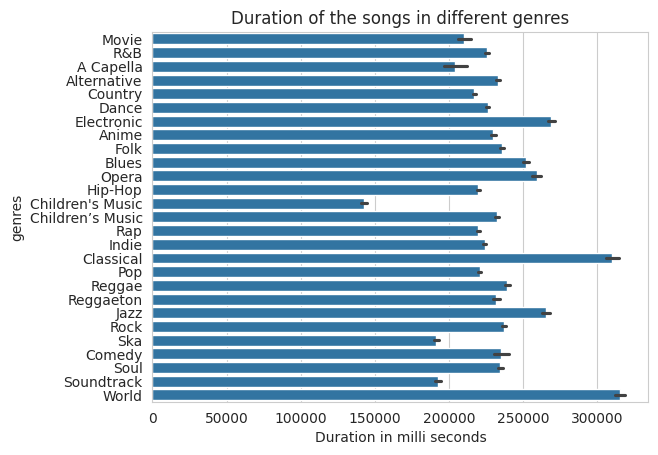

In [45]:
plt.title('Duration of the songs in different genres')
sns.color_palette('rocket',as_cmap=True)
sns.barplot(y='genre',x='duration_ms',data=df_genre)
plt.xlabel('Duration in milli seconds')
plt.ylabel('genres')

# What are the top 5 Genres by popularity?

[Text(0.5, 1.0, '')]

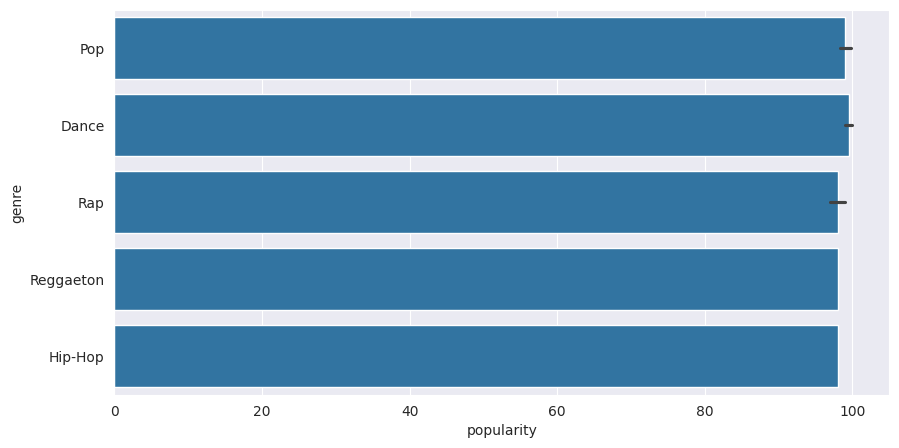

In [47]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
famous=df_genre.sort_values('popularity',ascending=False).head(10)
sns.barplot(y='genre',x='popularity',data=famous).set(title='')

We can see that 'Dance' is the most popular genre.

## Summary and Conclusion
1. 60% of the 10 least popular songs were not english songs.
2. There has been a continuous increase in the  number of songs available on spotify since 1920 till 2022.
3. Average duration of the songs increased rapidly from 1920 to 1940.
4. With time the interest of people and the amount to music listeners has been increased.
5. Popularity and Acousticness have a very strong correlation.
6. Highest duration for songs in milliseconds was for 'World'.


## References and Future work
With the changing year, all these calculations can be changed quickly by alternating the varoius parameters.

The graphs could be made clearer by setting the colours to the respective genres or years etc.

At last I hope to make a song recommendation model using Machine Learning.